<a href="https://colab.research.google.com/github/mluthfi1919/projectRF/blob/main/rf6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=8af29dfdea8e6d013b22625f5ab6286722e40bfe514f2251eadeaa8a8890fb3c
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [5]:
from micromlgen import port

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

from six import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/Penelitian/Dataset/NewDataset1.csv', index_col = 0)
print(df.head())
print(df.info())

      joint1    joint2    joint3    joint4  Gerakan
no                                                 
1   0.000000  0.000931  0.122721  0.151753        1
2   0.315640  0.001020  0.121800  0.146222        1
3   0.477911  0.000842  0.119556  0.144964        1
4   0.588258  0.000355  0.118274  0.148856        1
5   0.086910  0.001197  0.115029  0.155030        1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 1200
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   joint1   1200 non-null   float64
 1   joint2   1200 non-null   float64
 2   joint3   1200 non-null   float64
 3   joint4   1200 non-null   float64
 4   Gerakan  1200 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 56.2 KB
None


In [9]:
X = df.drop(['Gerakan'], axis=1)

y = df['Gerakan']

In [10]:
print('Input shape: ', X.shape)
print('Target variable shape: ', y.shape)

Input shape:  (1200, 4)
Target variable shape:  (1200,)


In [11]:
print(X[:10])

      joint1    joint2    joint3    joint4
no                                        
1   0.000000  0.000931  0.122721  0.151753
2   0.315640  0.001020  0.121800  0.146222
3   0.477911  0.000842  0.119556  0.144964
4   0.588258  0.000355  0.118274  0.148856
5   0.086910  0.001197  0.115029  0.155030
6   0.042060  0.007625  0.116431  0.158278
7   0.486189  0.005630  0.116952  0.160970
8   0.149519  0.010994  0.115750  0.161000
9   0.394658  0.008822  0.151529  0.159361
10  0.022522  0.214647  0.104251  0.161907


In [14]:
print(y[:500])

no
1      1
2      1
3      1
4      1
5      1
      ..
496    2
497    2
498    2
499    2
500    2
Name: Gerakan, Length: 500, dtype: int64


# SPLIT DATA TRAINING AND TESTING

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [33]:
X_train.shape, X_test.shape

((840, 4), (360, 4))

In [16]:
model = RandomForestClassifier(n_estimators = 50, criterion= 'gini', max_depth=2, random_state=0, bootstrap=True, oob_score=True)

# PEMODELAN RANDOM FOREST

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, oob_score=True,
                       random_state=0)

In [18]:
n_estimators = len(model.estimators_)
print('n_estimators: ', n_estimators)

n_estimators:  50


In [19]:
estimator = 15 # Extract single tree
estimator = model.estimators_[estimator]

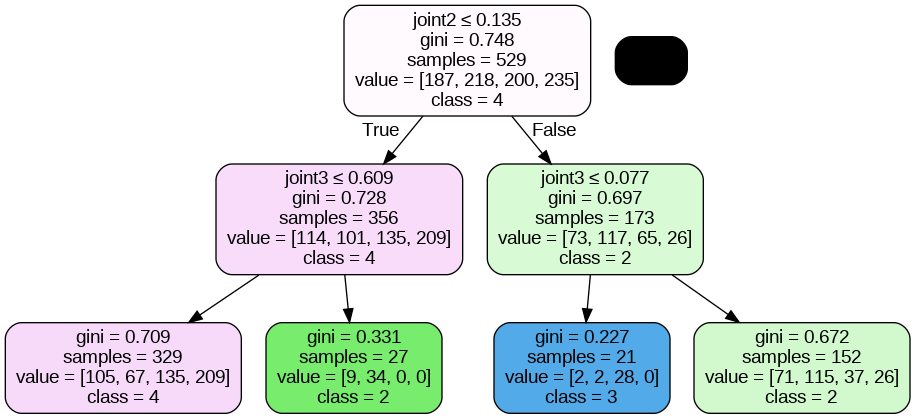

In [21]:
feature_cols = ["joint1", "joint2", "joint3", "joint4"]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('random_forest_classifier.png')
Image(graph.create_png())

# EVALUATE TRAINING

In [22]:
training_predict = model.predict(X_train)

In [23]:
print(metrics.classification_report(y_train, training_predict, digits = 3))

              precision    recall  f1-score   support

           1      0.750     0.015     0.029       206
           2      0.498     0.694     0.580       209
           3      0.893     0.442     0.592       208
           4      0.443     0.903     0.595       217

    accuracy                          0.519       840
   macro avg      0.646     0.513     0.449       840
weighted avg      0.644     0.519     0.451       840



In [24]:
print(metrics.confusion_matrix(y_train, training_predict))

[[  3  79   2 122]
 [  0 145   6  58]
 [  1  49  92  66]
 [  0  18   3 196]]


In [31]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_train, training_predict)*100,2)}%')

Model accuracy: 51.9%


# EVALUATE TESTING

In [26]:
test_predict = model.predict(X_test)

In [27]:
print(metrics.classification_report(y_test, test_predict, digits = 3))

              precision    recall  f1-score   support

           1      0.500     0.011     0.021        94
           2      0.485     0.692     0.570        91
           3      0.707     0.315     0.436        92
           4      0.396     0.892     0.548        83

    accuracy                          0.464       360
   macro avg      0.522     0.477     0.394       360
weighted avg      0.525     0.464     0.387       360



In [28]:
print(metrics.confusion_matrix(y_test, test_predict))

[[ 1 32  8 53]
 [ 1 63  1 26]
 [ 0 29 29 34]
 [ 0  6  3 74]]


In [32]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_test, test_predict)*100,2)}%')

Model accuracy: 46.39%


In [29]:
print(port(model))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[4] = { 0 };
                        // tree #1
                        if (x[3] <= 0.2684643268585205) {
                            if (x[1] <= 0.13256937265396118) {
                                votes[3] += 1;
                            }

                            else {
                                votes[1] += 1;
                            }
                        }

                        else {
                            if (x[3] <= 0.28572891652584076) {
                                votes[2] += 1;
                            }

                            else {
                                votes[2] += 1;
                      

In [30]:
with open('rf.h', 'w') as file:
    file.write(port(model))